<h1 align=center><font size = 5><b>Diabetes prediction project</b></font></h1>

<h3 align=center><font size = 3><b>A project by Boris Y. Nedyalkov</b></font></h3>
<h3 align=center><font size = 3>With data from https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset</font></h3>

<center> <img src="https://maldita.es/uploads/images/2021/11/618e89365f697edittowfiqu-barbhuiya-zjak9jqxeda-unsplash-jpg.jpg" width=700, height=700 /></center> 

Image source: https://maldita.es/malditaciencia/20221114/preguntas-respuestas-diabetes/

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases of India. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [56]:
df = pd.read_csv("diabetes.csv")

In [57]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
# show some statistical information on the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
# looking for correlation (r**2)
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [62]:
# let us see how many of each Outcome class ('0'-healthy '1'-sick with diabetes) we have
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

=> This dataset labels seems a tad unballanced ~ 2:1 

<AxesSubplot: >

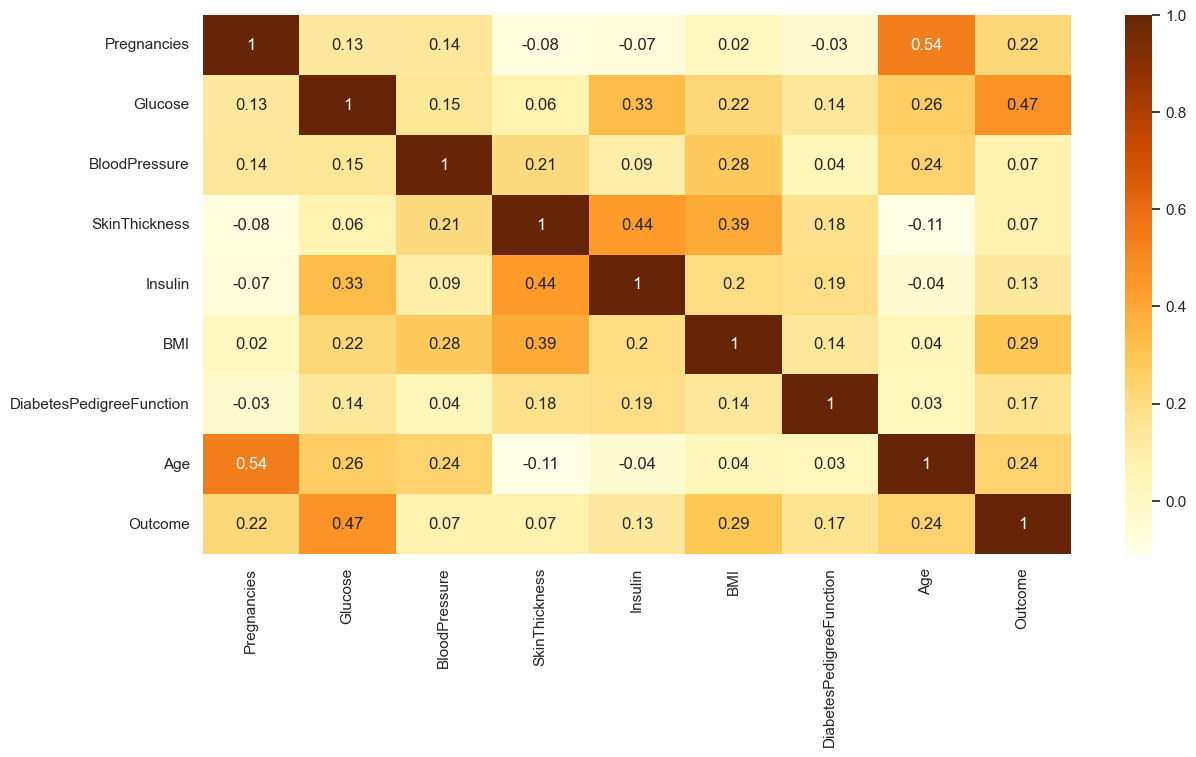

In [63]:
# looking for correlation with heatmap (r**2)
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

<Figure size 1200x1000 with 0 Axes>

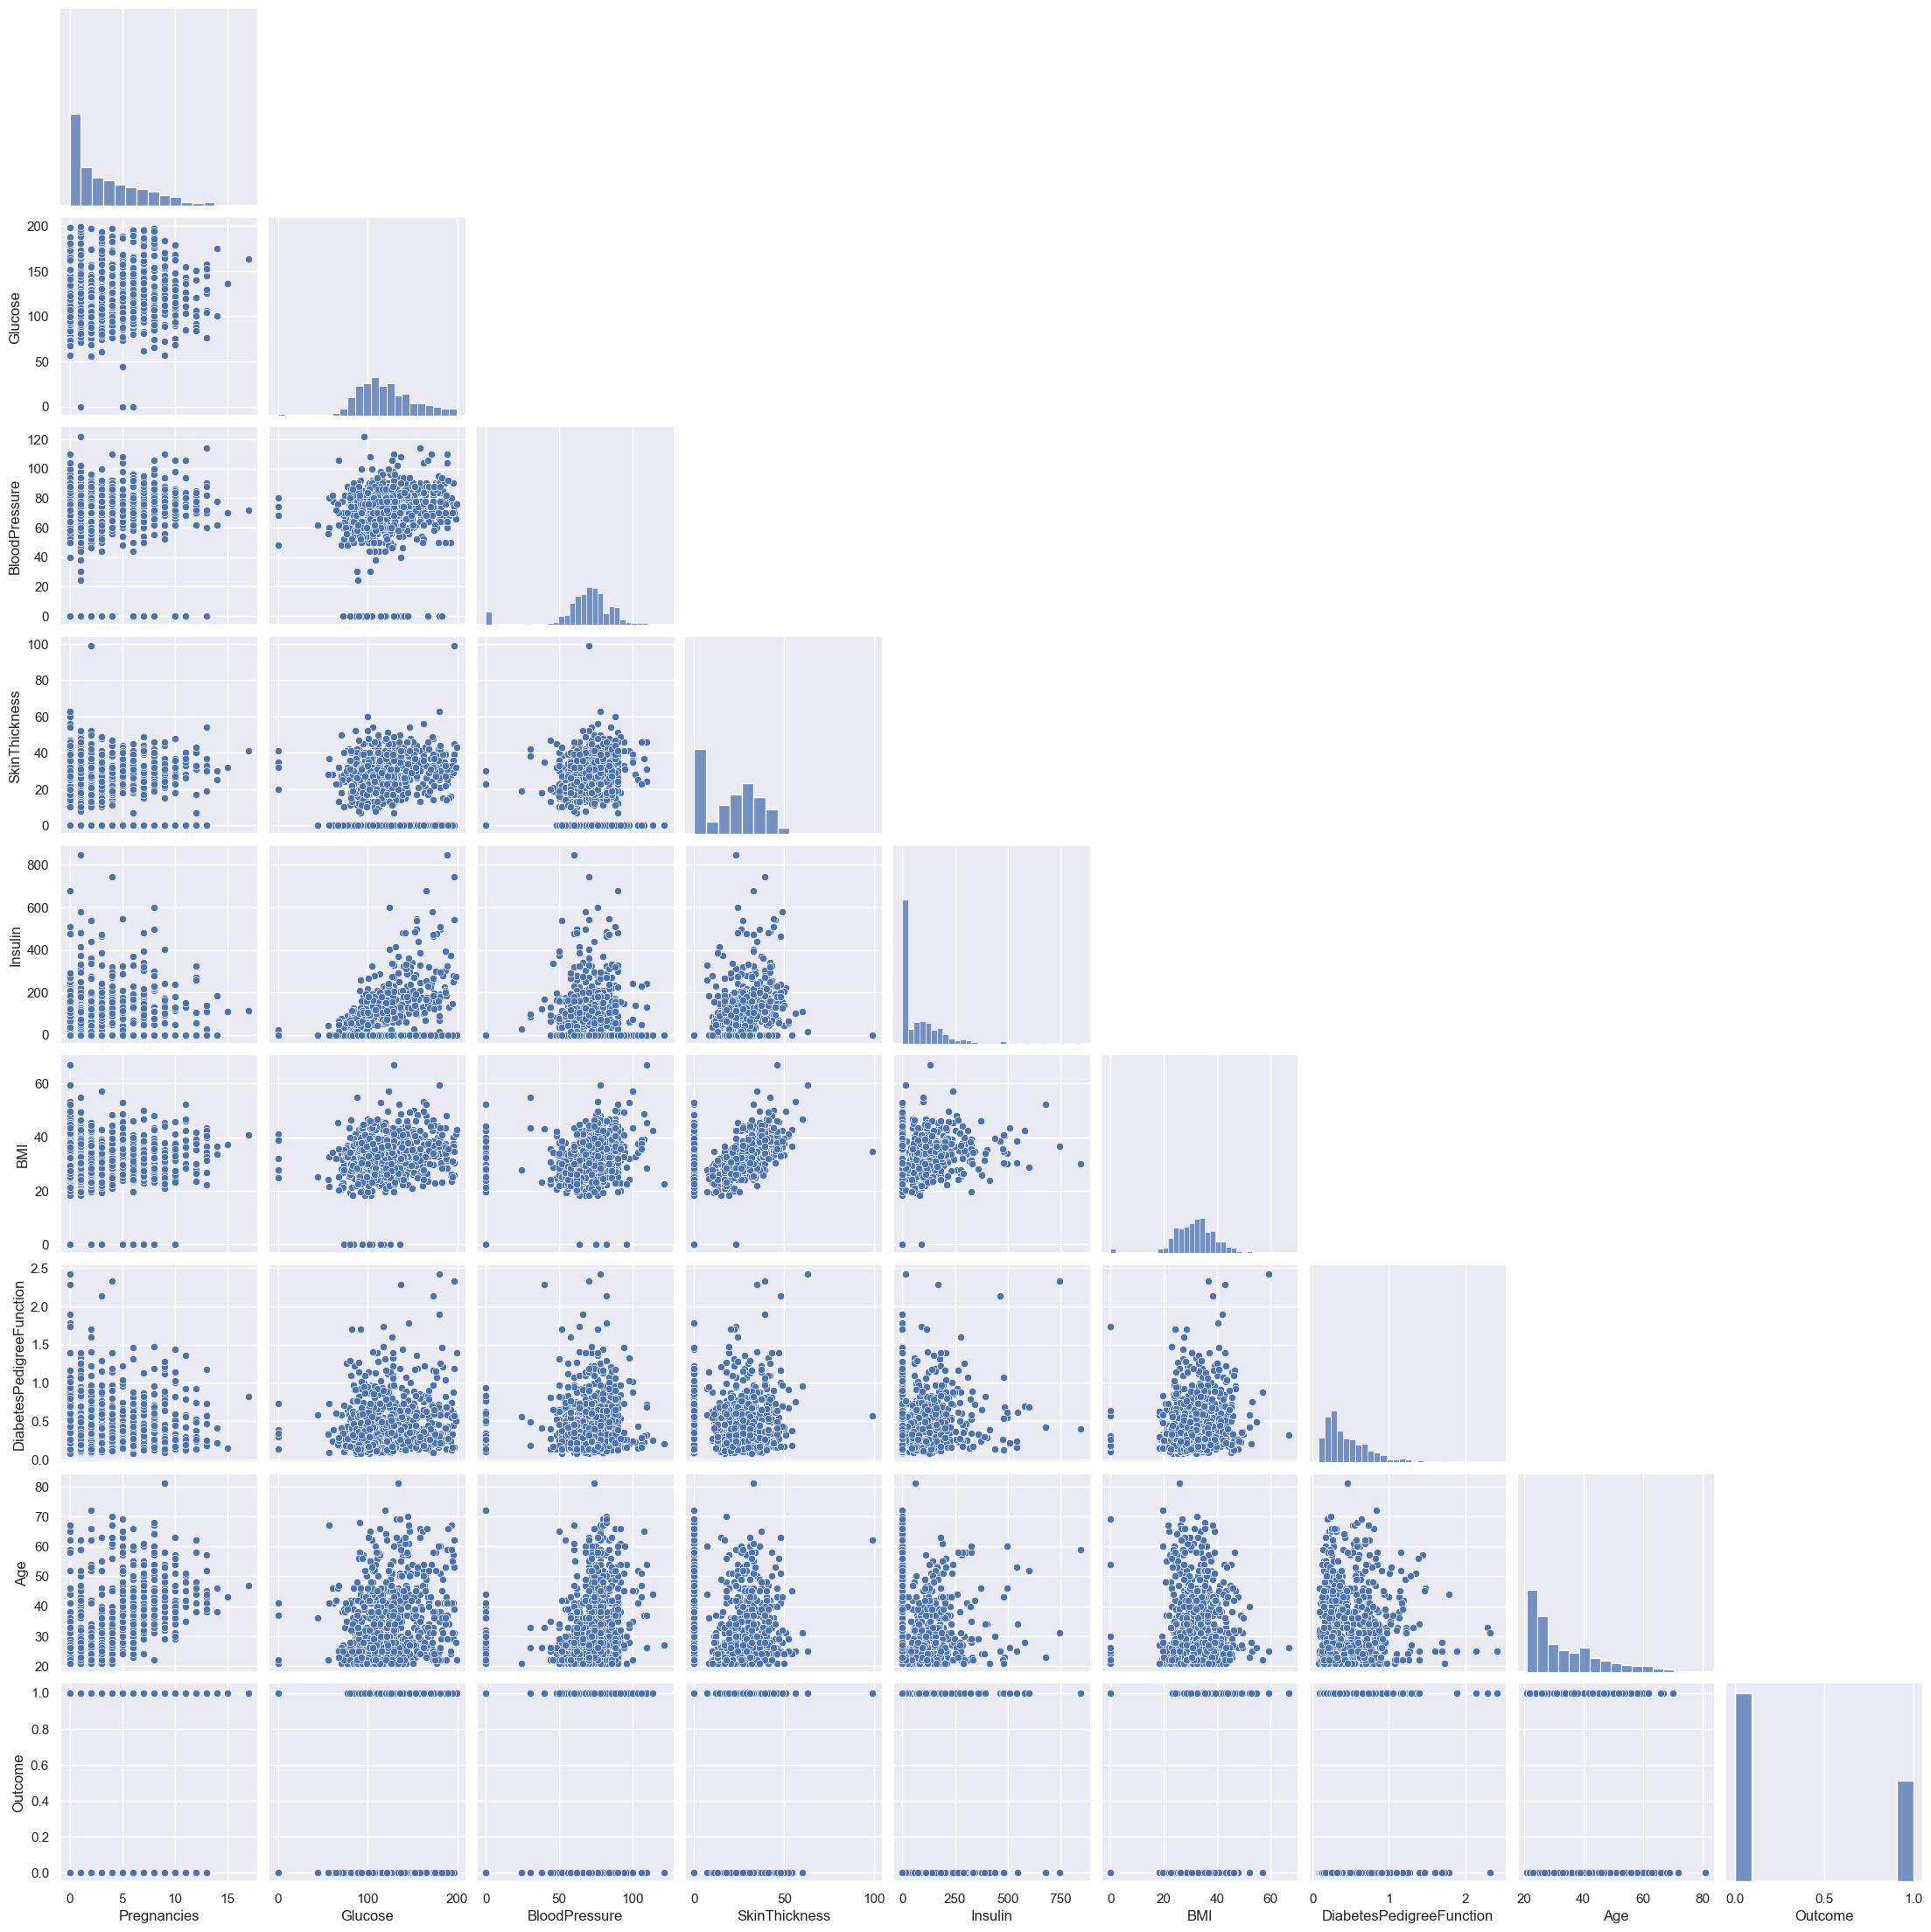

In [64]:
# scatterplots
plt.figure(figsize=(12,10))
sns.pairplot(df, corner= True)

There seem to be some values of Insulin, Skin Thickness, Blood Pressure, BMI, Glucose that are zero, we can replace those missing values with the mean values of the distribution

In [65]:
print(f'Total entries = {df.Insulin.count()}\n'
     f"Empty entries of the column Insulin = {df.Insulin[df.Insulin == 0].count()}\n"
     f"Empty entries of the column BloodPressure = {df.BloodPressure[df.BloodPressure == 0].count()}\n"
     f"Empty entries of the column BMI = {df.BMI[df.BMI == 0].count()}\n"
     f"Empty entries of the column Glucose = {df.Glucose[df.Glucose == 0].count()}\n"
     f"Empty entries of the column SkinThickness = {df.SkinThickness[df.SkinThickness == 0].count()}")

Total entries = 768
Empty entries of the column Insulin = 374
Empty entries of the column BloodPressure = 35
Empty entries of the column BMI = 11
Empty entries of the column Glucose = 5
Empty entries of the column SkinThickness = 227


The BMI and GLucose entries are few, we can exclude them. But the other ones are too many, if we delete them we'll be removing half of the data set. In addition, replacing the mwith the median or mean would skew the data a lot.
Thus we will apply K nearest neightbours to "machine learn" what those data points could be.

In [66]:
df['Insulin'].replace(0, np.nan, inplace = True) # replacing the null values with NaN
df['BloodPressure'].replace(0, np.nan, inplace = True) # replacing the null values with NaN
df['BMI'].replace(0, np.nan, inplace = True) # replacing the null values with NaN
df['Glucose'].replace(0, np.nan, inplace = True) # replacing the null values with NaN
df['SkinThickness'].replace(0, np.nan, inplace = True) # replacing the null values with NaN
df.isnull().sum() # checking if it worked

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [67]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_knn = df
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)
df_knn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,NaN,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,NaN,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,NaN,NaN,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [68]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)

In [74]:
df_imputed.isnull().sum() # checking if it worked

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
df = pd.DataFrame(scaler.inverse_transform(df_imputed), columns = df_knn.columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.2,238.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,150.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,26.4,122.4,30.1,0.349,47.0,1.0


Now we have a nice filled with values dataframe to work with. 
Let us plot the distributions of it again.

<AxesSubplot: >

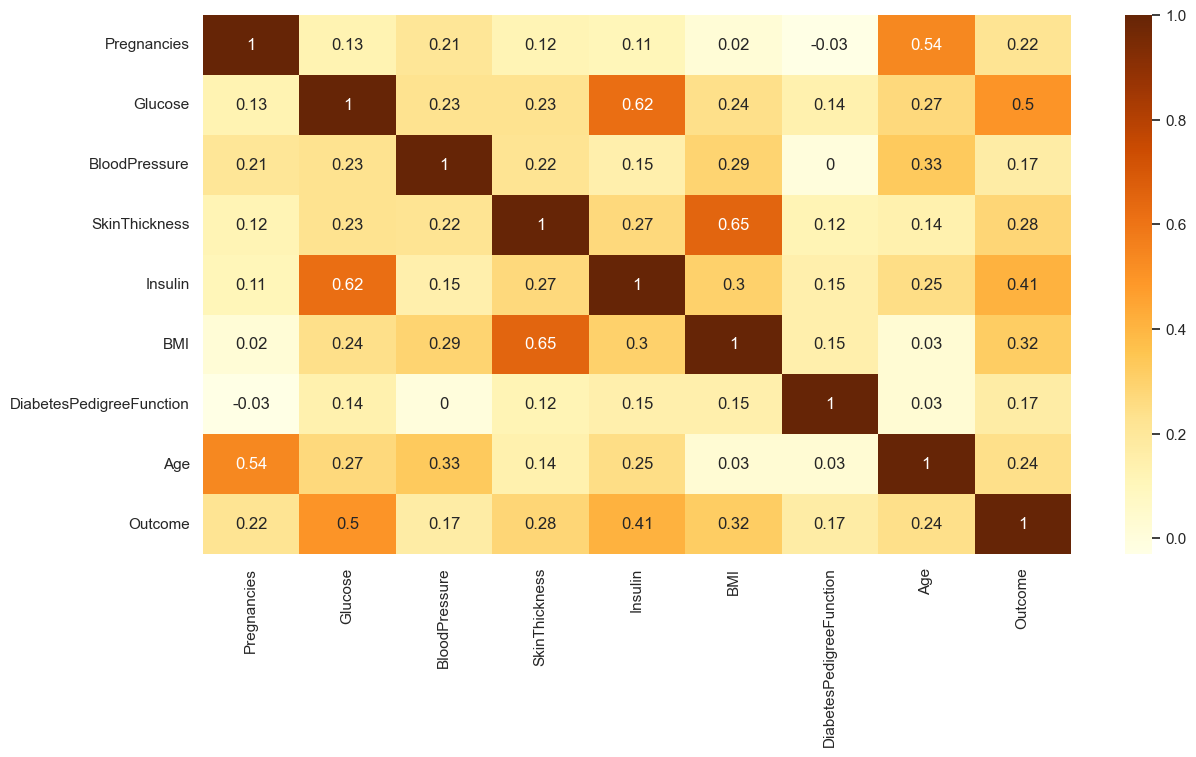

In [76]:
# looking for correlation with heatmap (r**2)
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

One immediately sees correlations that were not visible before due to the extreme outliers.

<Figure size 1200x1000 with 0 Axes>

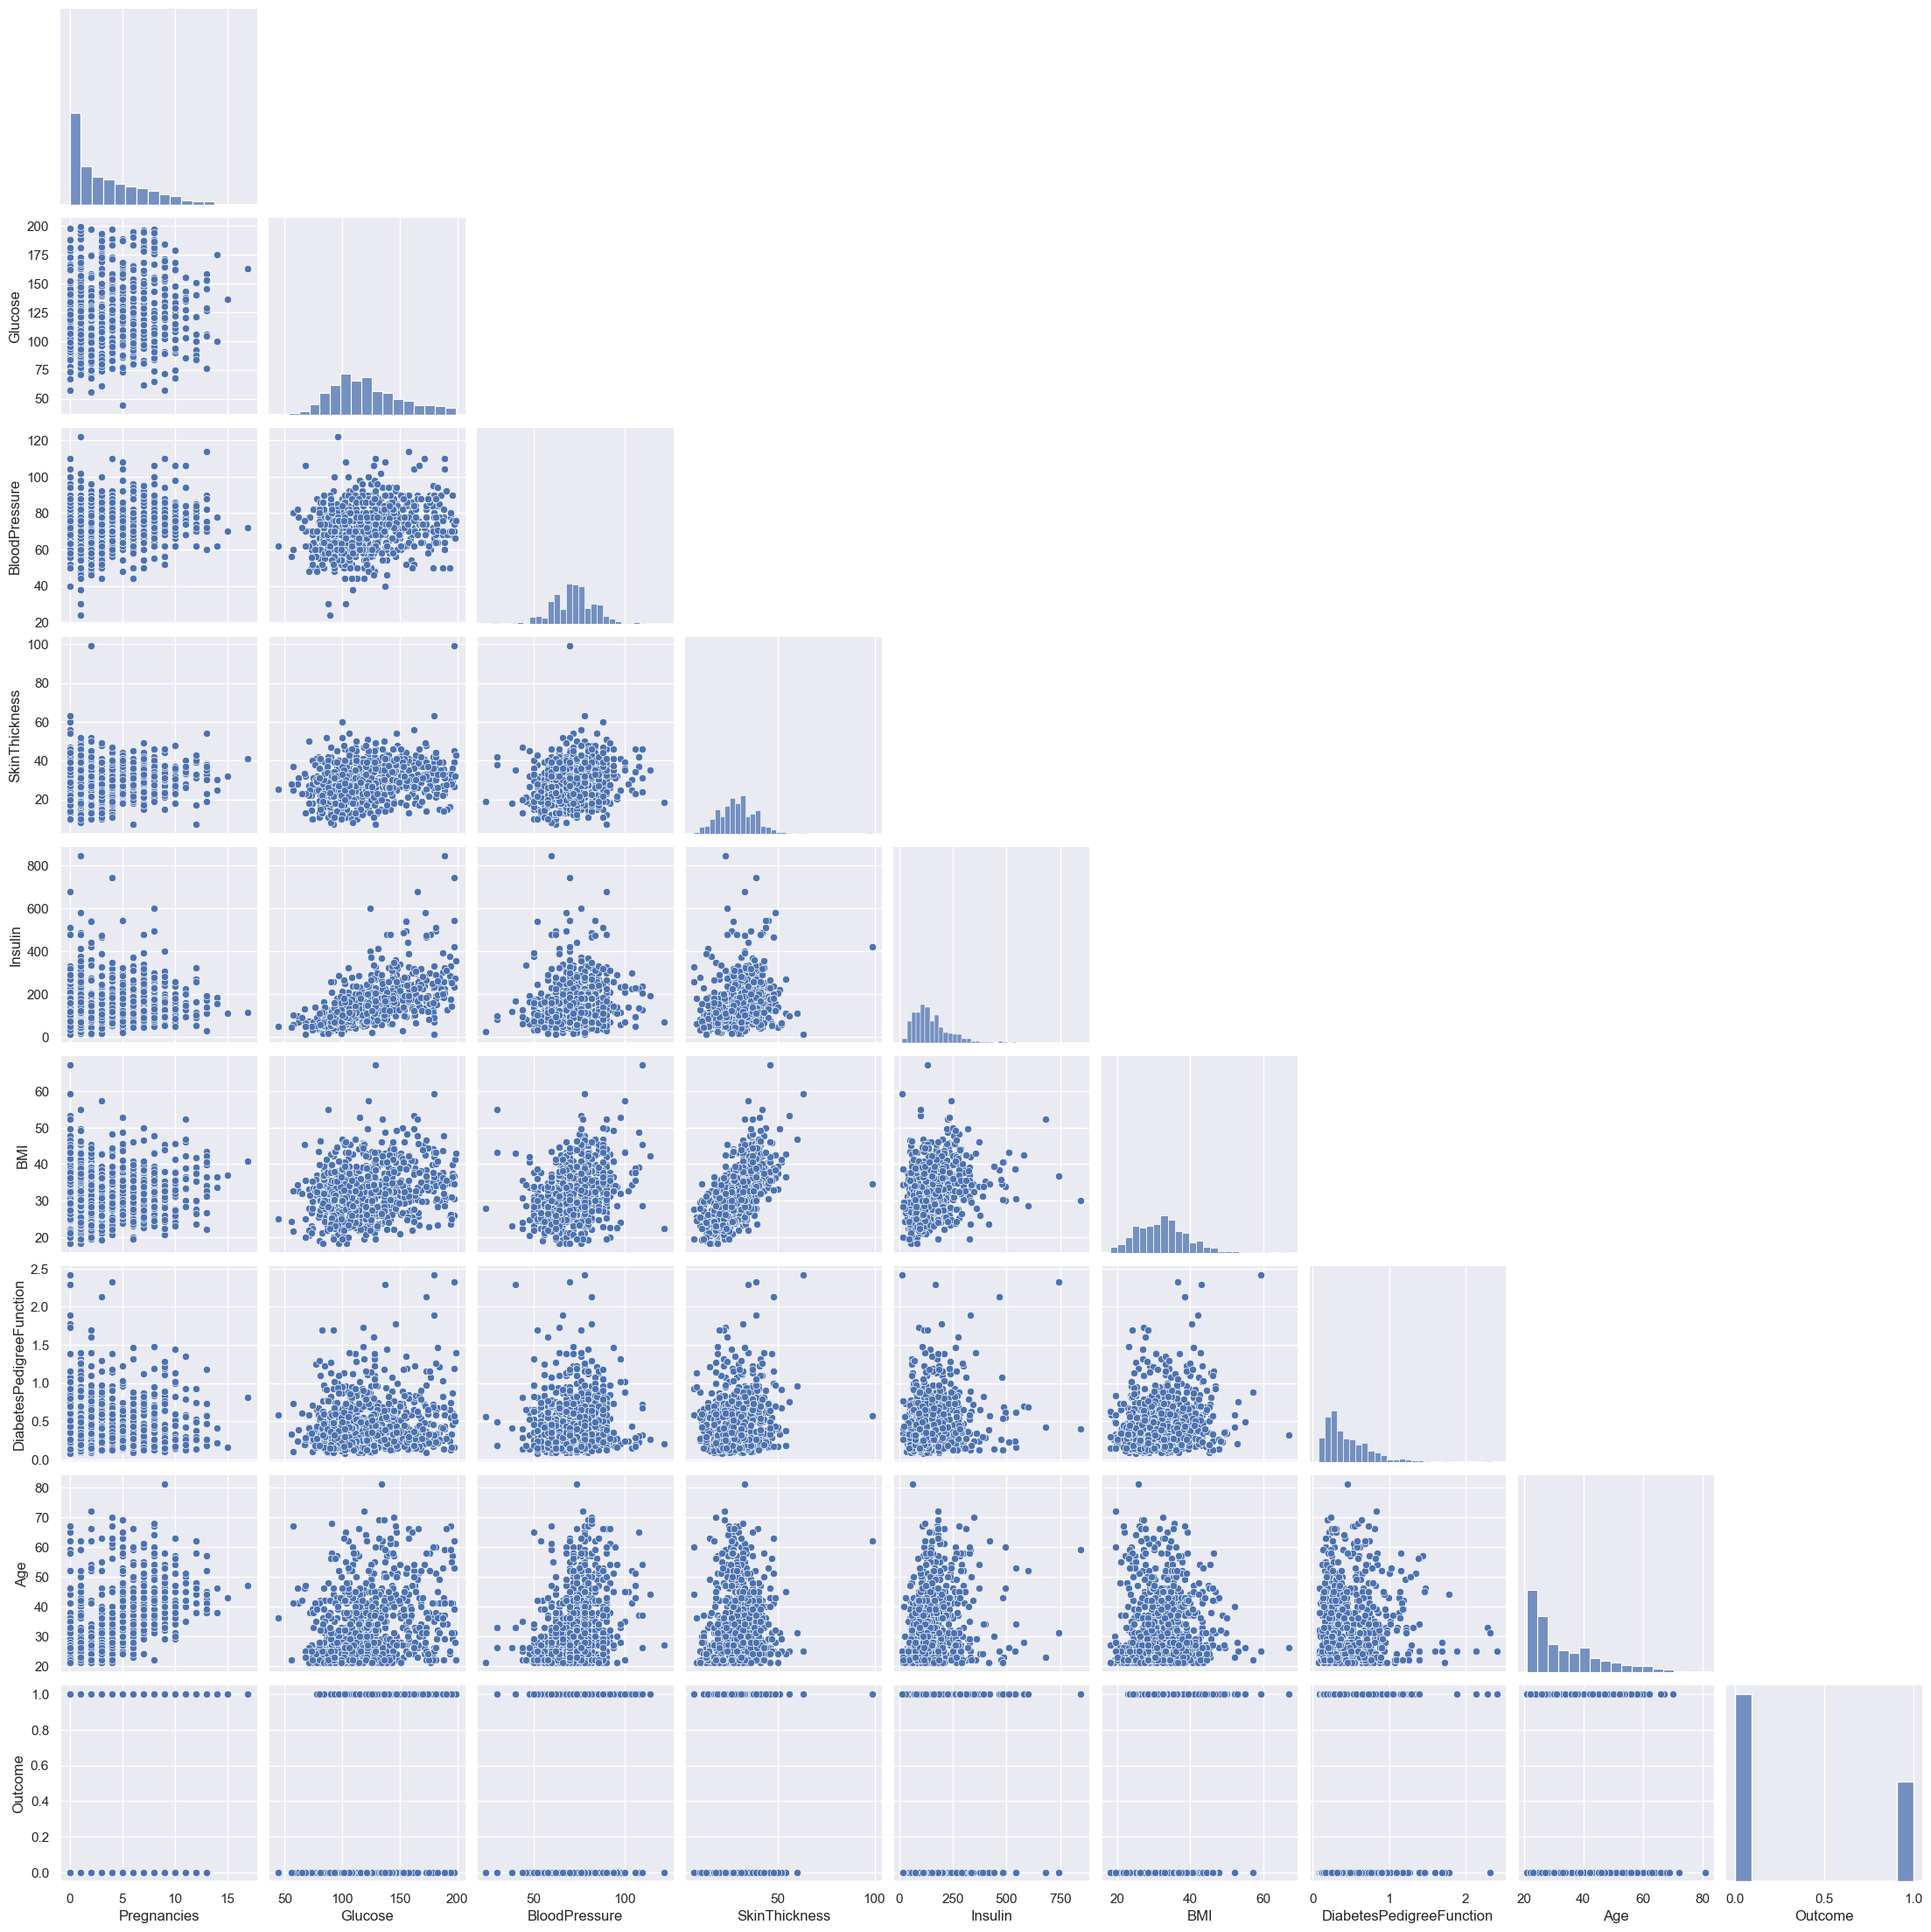

In [78]:
# scatterplots
plt.figure(figsize=(12,10))
sns.pairplot(df, corner= True)

<Figure size 1200x1000 with 0 Axes>

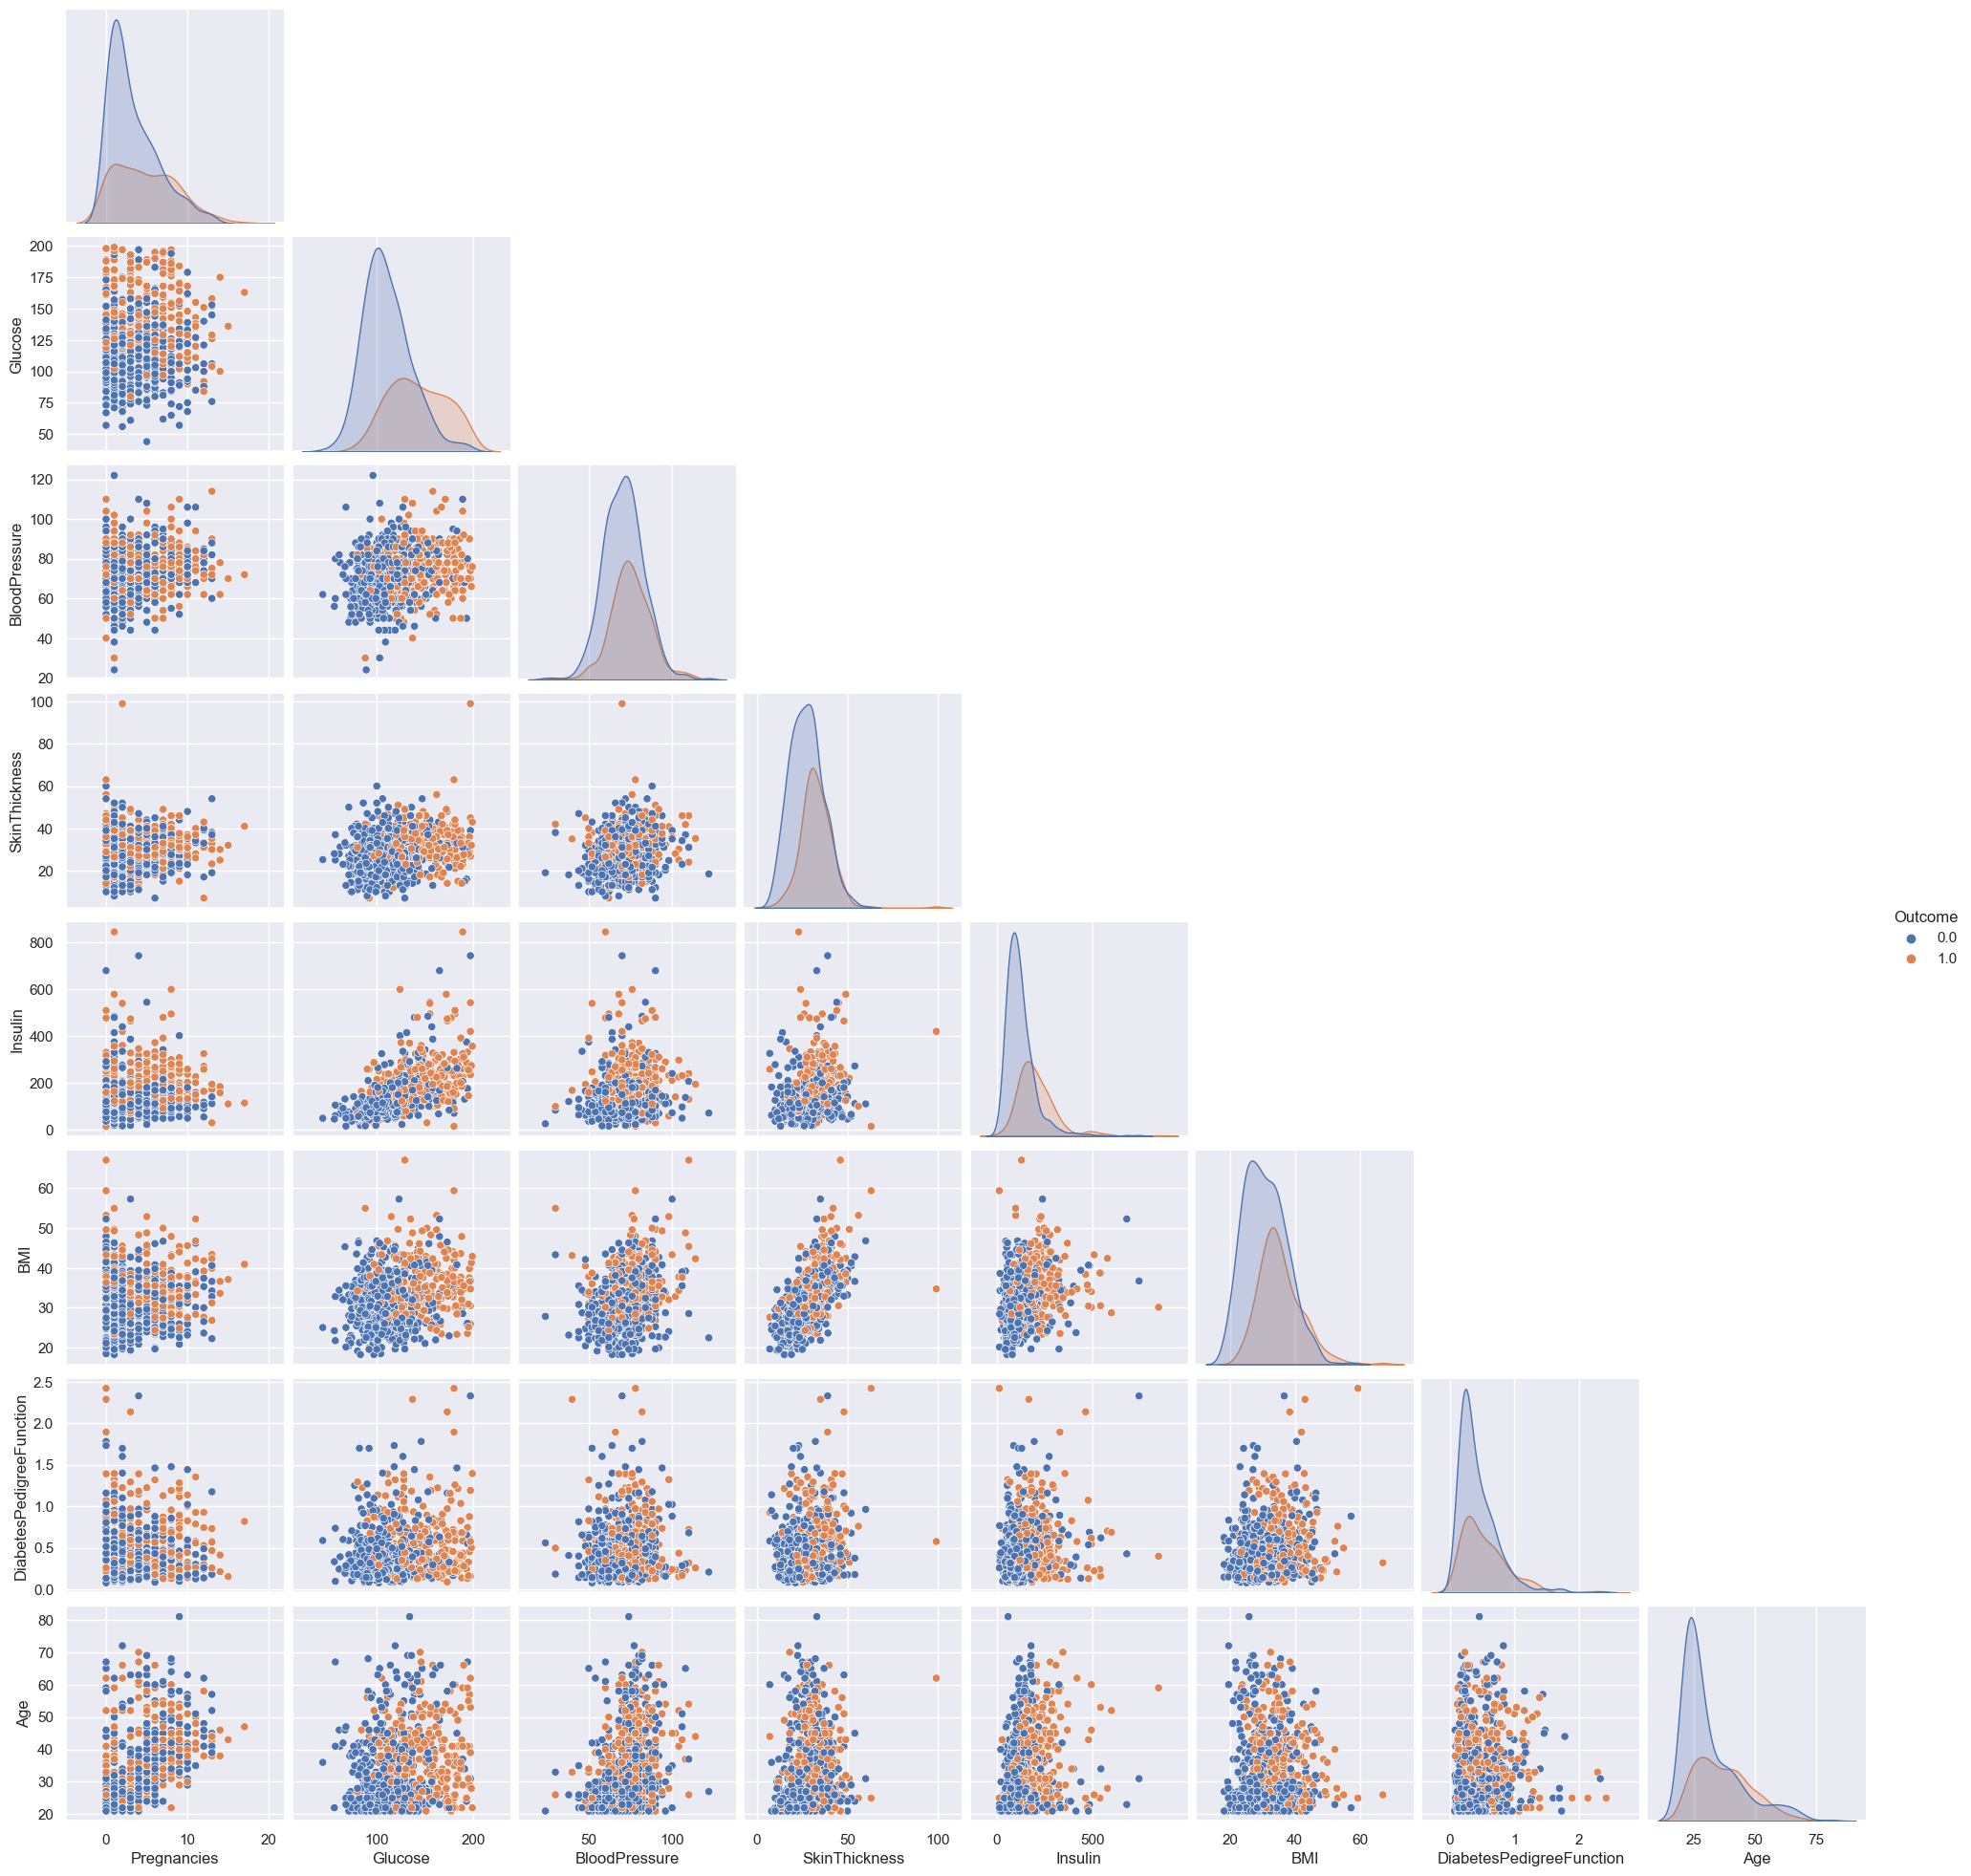

In [79]:
# scatterplots
plt.figure(figsize=(12,10))
sns.pairplot(df, hue='Outcome', corner= True)

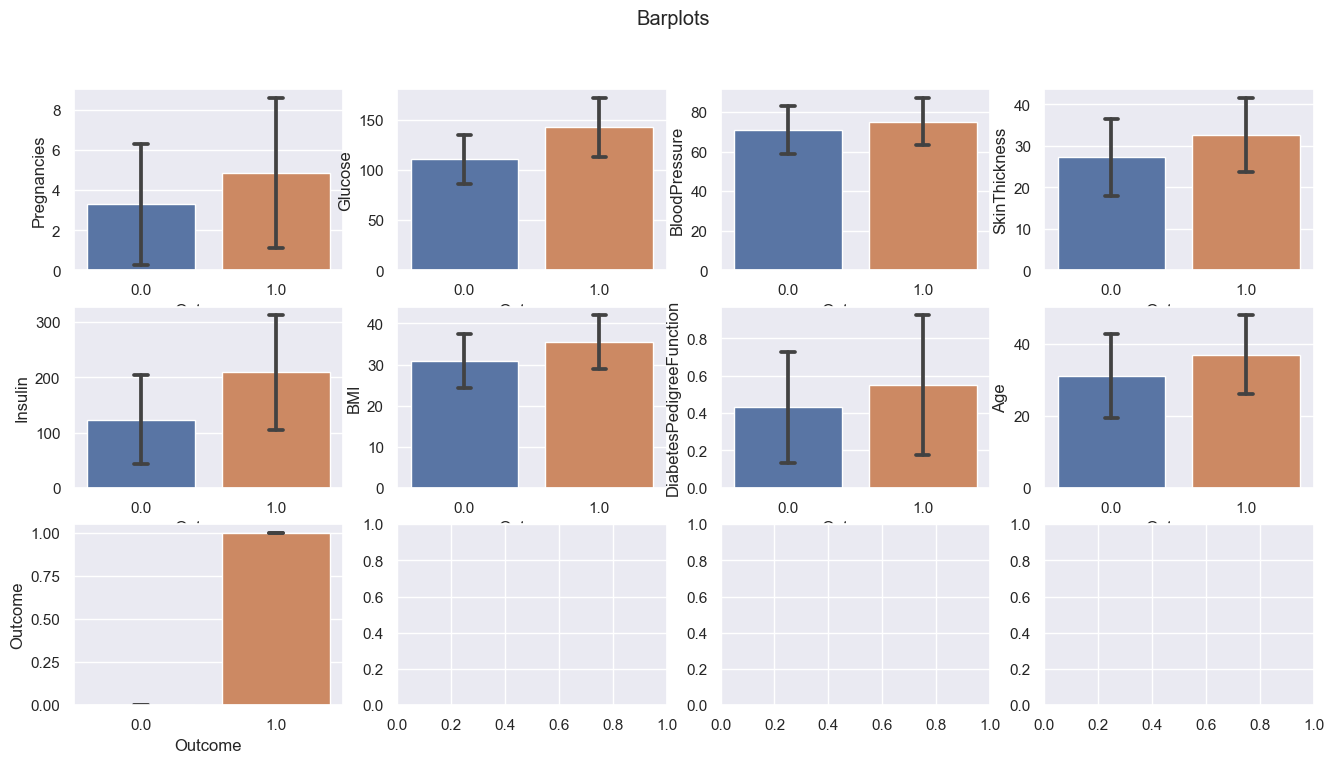

In [80]:
fig, axes = plt.subplots(3, 4, figsize=(16,8))
fig.suptitle('Barplots')

i = 0
for col in df.columns:
    sns.barplot(ax = axes[i//4,i%4], y=col, x='Outcome', data=df, errorbar = "sd", capsize = 0.1, estimator=np.mean)  
    i = i + 1
    # graph1.axhline(1.0, linestyle="dashed")

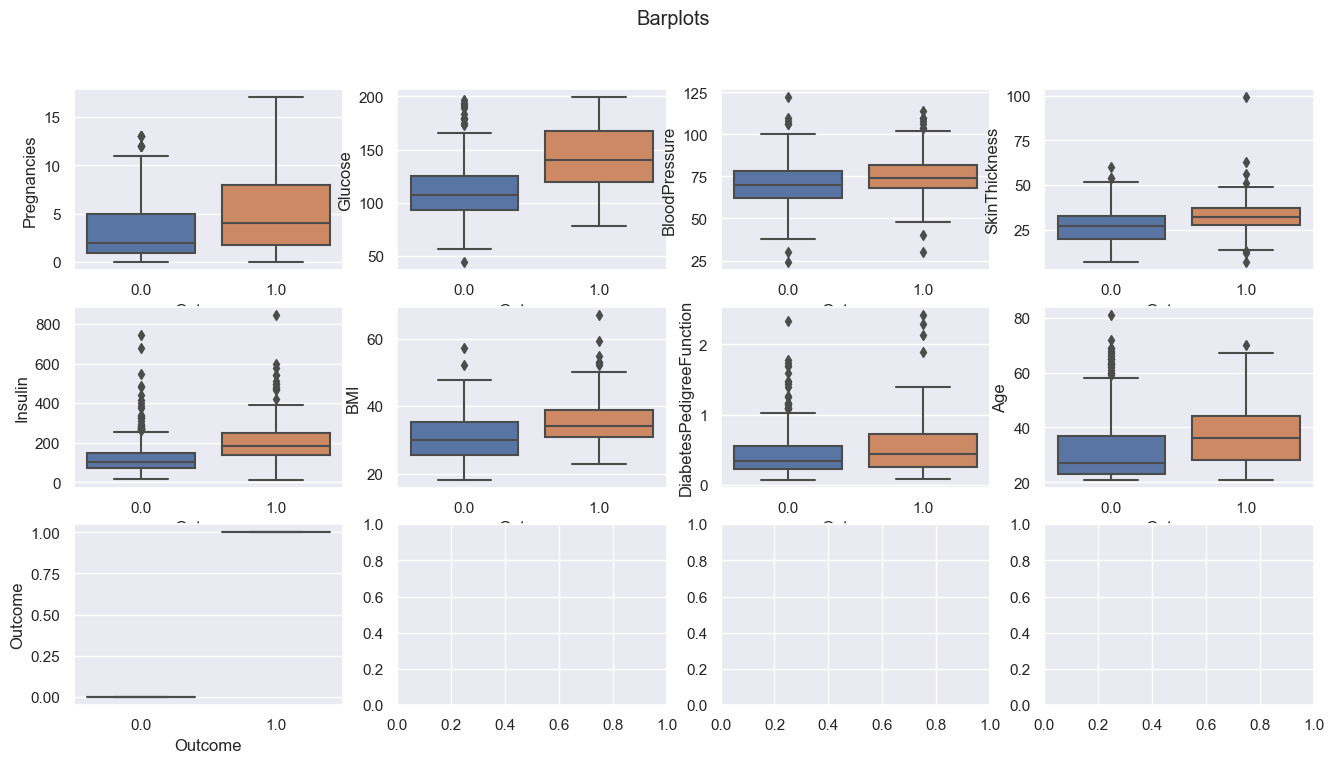

In [83]:
fig, axes = plt.subplots(3, 4, figsize=(16,8))
fig.suptitle('Barplots')

i = 0
for col in df.columns:
    sns.boxplot(ax = axes[i//4,i%4], y=col, x='Outcome', data=df)  
    i = i + 1
    # graph1.axhline(1.0, linestyle="dashed")

In [81]:
df.to_csv("data_prepared_for_ML.csv", index=False)